<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_time_series.ipynb#scrollTo=WfzIAI-J6TEO">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_time_series.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Time series analysis:
> ## Greenland increase of temperature
> *data and code from Emanuela Cosma


## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
Define a vector that contains the names of the packages to install, then perform only one function.
The [raster](https://) package defines classes and methods for spatial raster data access and manipulation. The [rasterVis](https://) package complements raster providing a set of methods for enhanced visualization and interaction.
The [rgdal](https://www.rdocumentation.org/packages/rgdal/versions/1.5-23) package provides links to the [GDAL](https://gdal.org/) library (Geospatial Data Abstraction Library) and access to projection/transformation operations from the "PROJ" library.


In [ ]:
pk <- c("rgdal", "raster", "rasterVis")
install.packages(pk)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
With the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we apply the `library()` function to all elements of the vector that contains the package names.

In [ ]:
lapply(pk, library, character.only = TRUE)

Set the current working directory of the R process with the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function.

In [4]:
setwd("/content")

## Upload file
1. Download images of Greenland for the years 2000, 2005, 2010 and 2015. Use the [Land Surface Temperature](https://land.copernicus.eu/global/products/lst) product from the Copernicus program.

2. On the left side of Google Colab click on the small folder icon named file ⇒ click the Upload icon ⇒ choose the files to upload from your "Downloads" folder and click OK. Otherwise, drag your files to Google Colab storage. Now your files are on Google Colab!



## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 
In this case we use the [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/raster) function to read files with a single layer or band (RasterLayer object).

In [8]:
lst_2000 <- raster("lst_2000.tif")
lst_2005 <- raster("lst_2005.tif")
lst_2010 <- raster("lst_2010.tif")
lst_2015 <- raster("lst_2015.tif")

## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object. Using the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function it is possible to set the parameters of the graphic output and create a multi frame of images.

In [ ]:
par(mfrow=c(2,2))
plot(lst_2000)
plot(lst_2005)
plot(lst_2010)
plot(lst_2015)

The code above is somewhat redundant. We can use recursive functions like [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) to apply a certain function (in this case the `raster()` function) to a list of objects (for example our images of Greenland).
Before doing this we create a list containing our images with the [list.files](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/list.files) function.
L'attributo pattern indica alla funzione quali caratteri comuni sceglire per la selezione delle immagini nella nostra working directory.

In [10]:
rlist <- list.files(pattern="lst")
import <- lapply(rlist, raster)

Now create a multilevel object that has a raster image for each layer or band. The new collection must be a RasterStack object with four bands one for each year. To do this we use the [stack](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/stack) function.

In [ ]:
TGr <- stack(import)
plot(TGr)

### Multi-temporal images
Individual bands can be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from multi-band satellite images.
In this case, the resulting color tone in the image will be linked to the combination of the different LST values for the years assigned to the three RGB bands.
For example, we assign the year 2005 to the red band (R = 2), the year 2010 to the green band (G = 3) and the year 2015 to the blue band (B = 4). In the image, all those areas with temperature values for 2015 that are higher than the other two time levels (2005 and 2010) will appear with shades of blue.


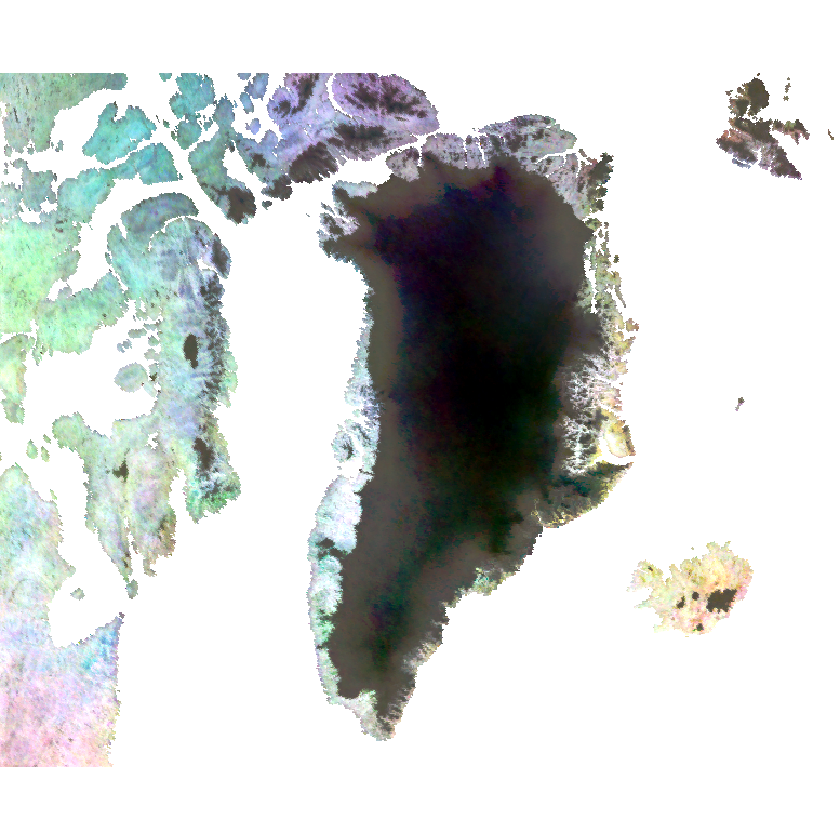

In [12]:
plotRGB(TGr, r=2, g=3, b=4, stretch="Lin")

A RasterStack object can be easily represented with the [levelplot](https://www.rdocumentation.org/packages/rasterVis/versions/0.50.1/topics/levelplot-methods) function of the [rasterVis](https://www.rdocumentation.org/packages/rasterVis/versions/0.50.1) package. The `levelplot()` function allows you to create a multi-temporal frame with a box for each level.

In [ ]:
levelplot(TGr)

### Colour change
Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into n-levels.

In [ ]:
cl <- colorRampPalette(c("blue","light blue","pink","red"))(100)
# assign a title to each image and to the multi frame
levelplot(TGr,
          col.regions=cl, 
          # assign a title
          main = "LST variation in time",
          # rename each layer of the image
          names.attr = c("July 2000","July 2005", "July 2010", "July 2015"))

## Time series visualization
Analyze images of Greenland from 1979 to 2007.
Uses the surface temperature values of the "MODIS" product. 
We get 28 total images (one for each year) that need to be uploaded to Google Colab storage. 
Create a collection of images using the `list.files()` function and convert this list into a RasterStack object with the `stack()` function.

In [ ]:
meltlist <- list.files(pattern="melt")
melt_import <- lapply(meltlist,raster)
melt <- stack(melt_import)
# multi-temporal frame
levelplot(melt)

### 

In [ ]:
melt_amount <- melt$X2007annual_melt - melt$X1979annual_melt
clb <- colorRampPalette(c("blue","white","red"))(100)
# visualization melt area
plot(melt_amount, col=clb)

In [ ]:
levelplot(melt_amount, col.regions=clb)